In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 加載Iris數據集
iris = load_iris()
X, y = iris.data, iris.target

# 切分數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM_STATE = 100

# 創建隨機森林分類器實例
clf = RandomForestClassifier(random_state=RANDOM_STATE)

# 設定n_estimators的值範圍
param_grid = {'n_estimators': [10, 50, 100, 200]}

# 使用GridSearchCV進行交叉驗證，尋找最佳的n_estimators
cv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)

# 在訓練集上訓練
cv_clf.fit(X_train, y_train)

# 獲取最佳參數和最佳準確率
best_params = cv_clf.best_params_
best_score = cv_clf.best_score_

best_params, best_score

({'n_estimators': 50}, 0.9333333333333332)

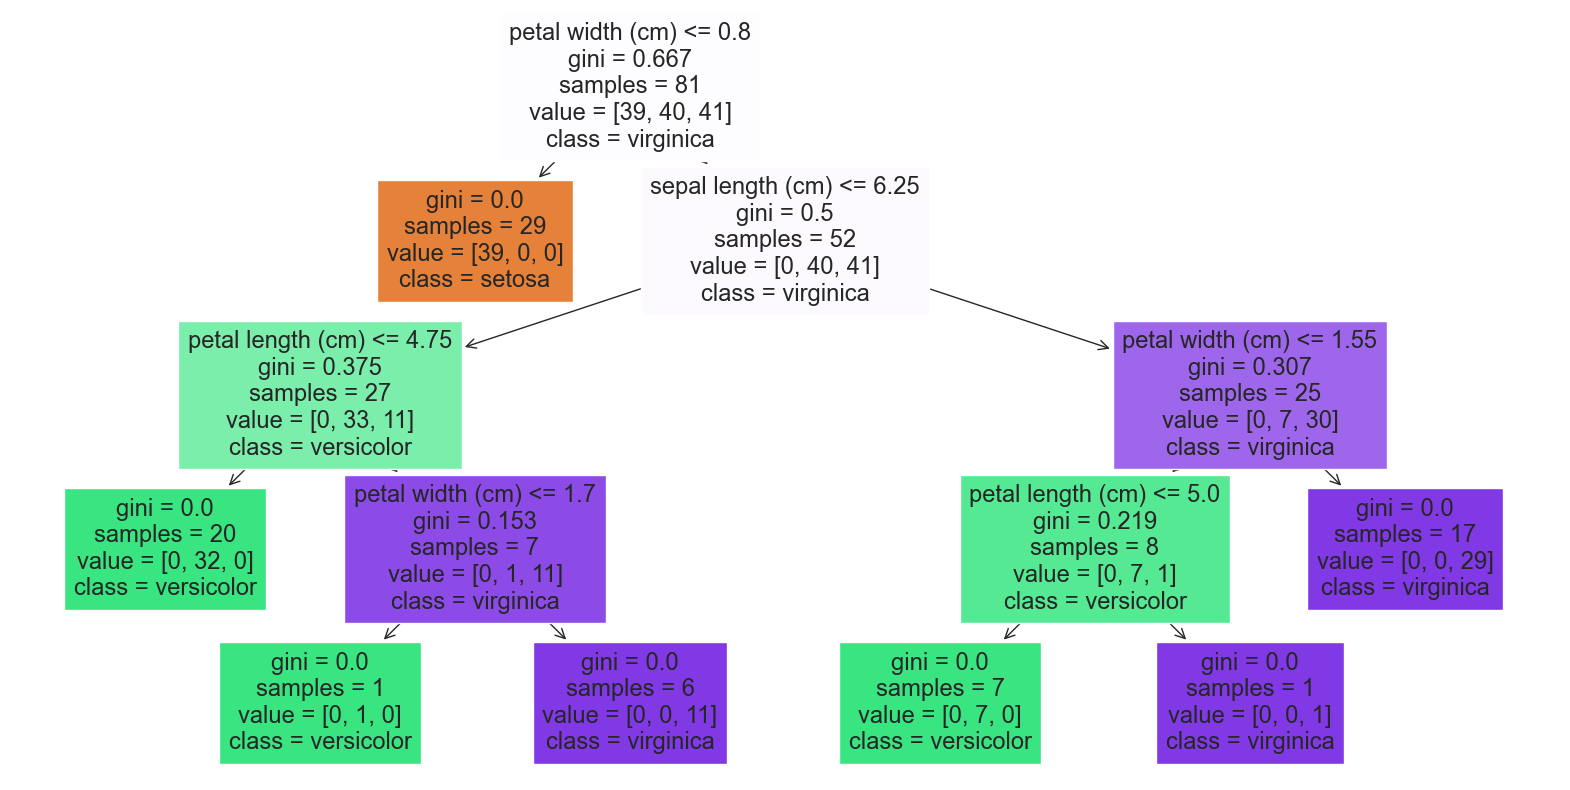

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 使用最佳參數n_estimators=100重新創建隨機森林分類器
best_clf = RandomForestClassifier(random_state=RANDOM_STATE, **best_params)
best_clf.fit(X_train, y_train)

# 為了可視化，我們只繪製隨機森林中的一棵樹
# 選擇第一棵樹
tree_in_forest = best_clf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_in_forest, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()